# The Sparks Foundation [Grip: Dec,2022]

## Data Science and Business Analytics Internship

###  <b><font color='red'>(Task 6- Creating a Decision Tree Classifier and Visulazing it Graphically)

#### Author- Siddharth Rajput

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
iris_dataset = pd.read_csv('Iris.csv')
iris_dataset.head(5).set_index('Id')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print("The shape of Iris Dataset is:",iris_dataset.shape)
print('--------------')
print(iris_dataset.describe())

The shape of Iris Dataset is: (150, 6)
--------------
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [5]:
iris_dataset.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
## Changing the categorical data in the numerical data by using One hot encoded.

one_hot_encoded_data = pd.get_dummies(iris_dataset, columns = ['Species'])
print(one_hot_encoded_data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

     Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica  
0                      1                        0                       0  
1      

In [8]:
iris_dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [14]:
## Building the Model using Decision Tree.

from sklearn.model_selection import train_test_split

x = iris_dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris_dataset.Species

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=100)

In [15]:
# Training the Algorithm. Here we would use DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
y_pred = classifier.predict(x_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[14  0  0]
 [ 0  9  1]
 [ 0  1 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.95        38
      macro avg       0.94      0.94      0.94        38
   weighted avg       0.95      0.95      0.95        38

0.9473684210526315


In [18]:
from sklearn import tree ## For visualizing the data in the tree formation

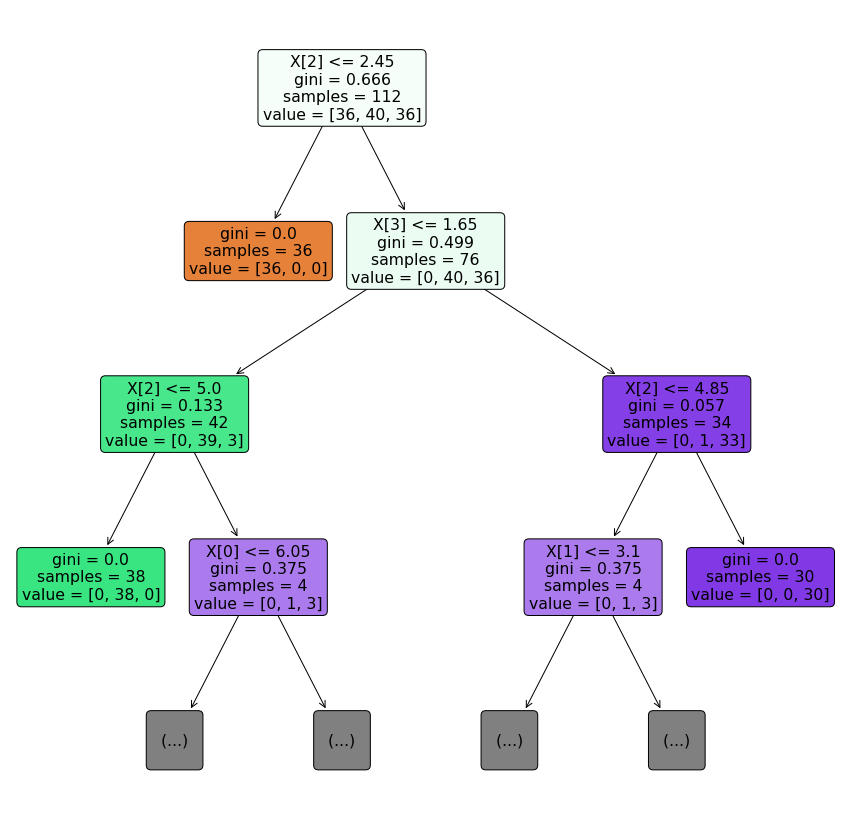

In [28]:
fig = plt.figure(figsize = (15,15))
tree.plot_tree(classifier,filled = True,rounded = True,max_depth = 3)
plt.show()

## Now we can validate our Decision tree using cross validation method to get the accuracy or performance score of our model.

In [51]:
from sklearn.model_selection import cross_val_score ## Cross Validation library

In [52]:
cross_val_score = cross_val_score(classifier,x,y,cv=3,scoring = 'accuracy').mean()

In [53]:
print("The Cross Validation Score is:",cross_val_score)

The Cross Validation Score is: 0.9666666666666667
